Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(10,5)

Load Amazon Sales Dataset

In [3]:
df=pd.read_csv(r"C:\Users\anavi\Documents\Amazon Sale Report.csv")

C:\Users\anavi\AppData\Local\Temp\ipykernel_13580\2967896200.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\anavi\Documents\Amazon Sale Report.csv")


Basic information about the dataset

In [4]:
#Shape of dataset
print("-> Shape of dataset:",df.shape)

#First 5 rows of dataset using head()
print("-> First 5 rows:")
display(df.head())

#Info about dataset
print("-> Dataset info:")
df.info()

#Basic stats for numeric columns
print("-> Descriptive statistics:")
display(df.describe())

-> Shape of dataset: (128975, 24)
-> First 5 rows:


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


-> Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount           

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


Data Cleaning

In [5]:
#How many values are missing in each column
missing=df.isnull().sum()
#Columns where atleast 1 value is missing
missing=missing[missing>0].sort_values(ascending=False)
print("Missing values in Columns:")
print(missing)

Missing values in Columns:
fulfilled-by        89698
promotion-ids       49153
Unnamed: 22         49050
currency             7795
Amount               7795
Courier Status       6872
ship-city              33
ship-state             33
ship-postal-code       33
ship-country           33
dtype: int64


Drop the column "fulfilled-by", "promotion-ids", "Unnamed: 22" as they have too many missing values and would not be useful

In [6]:
df.drop(columns=['fulfilled-by', 'promotion-ids', 'Unnamed: 22'], inplace=True)

In [7]:
#Unique values in 'currency'
print("Unique values in currency:",df['currency'].unique())

#No. of rows missing in both
print("Rows where currency or amount are missing:",df[df['currency'].isnull() | df['Amount'].isnull()].shape[0])

Unique values in currency: ['INR' nan]
Rows where currency or amount are missing: 7795


As all the non null entries had 'INR' as the currency, i could have filled that in place of null entries. But since 'Amount' which is a crucial numeric column was also missing in the same rows, i decided to drop them to avoid introducing fake or misleading data.

In [8]:
df.drop(columns=['Amount','currency'], inplace=True)
df.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status        6872
Qty                      0
ship-city               33
ship-state              33
ship-postal-code        33
ship-country            33
B2B                      0
dtype: int64

In columns 'ship-city','ship-state','ship-postal-code','ship-country' only 33 rows are missing which is a very small number so its better to drop the rows where nay of these 4 columns are missing. Fill 'Courier Status' missing values with 'Unknown'.

In [9]:
df=df.dropna(subset=['ship-city','ship-state','ship-postal-code','ship-country'])
df['Courier Status']=df['Courier Status'].fillna('Unknown')

In [10]:
print(df.isnull().sum())

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64


Now that the dataset is cleaned, reset the index (as we dropped rows).

In [11]:
df.reset_index(drop=True,inplace=True)

Explore the cleaned data now

In [12]:
print(df.describe(include='all'))

                index             Order ID      Date   Status Fulfilment  \
count   128942.000000               128942    128942   128942     128942   
unique            NaN               120350        91       13          2   
top               NaN  403-4984515-8861958  05-03-22  Shipped     Amazon   
freq              NaN                   12      2085    77788      89678   
mean     64487.184920                  NaN       NaN      NaN        NaN   
std      37230.924392                  NaN       NaN      NaN        NaN   
min          0.000000                  NaN       NaN      NaN        NaN   
25%      32246.250000                  NaN       NaN      NaN        NaN   
50%      64485.500000                  NaN       NaN      NaN        NaN   
75%      96730.750000                  NaN       NaN      NaN        NaN   
max     128974.000000                  NaN       NaN      NaN        NaN   

       Sales Channel  ship-service-level    Style           SKU Category  \
count      

In [13]:
#Unique categories
print("Unique categories of 'Category':",df['Category'].unique())
print("Unique categories of 'Status':",df['Status'].unique())
print("Unique categories of 'Courier Status':",df['Courier Status'].unique())

Unique categories of 'Category': ['Set' 'kurta' 'Western Dress' 'Top' 'Ethnic Dress' 'Bottom' 'Saree'
 'Blouse' 'Dupatta']
Unique categories of 'Status': ['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping']
Unique categories of 'Courier Status': ['Unknown' 'Shipped' 'Cancelled' 'Unshipped']


'Category' and 'Courier Status' has 9 and 4 unique categories respectively. But Status has 13 categories which can get confusing to analyze and interpret, so we can make our analysis easier and effective by grouping the similar categories, mapping them and simplifying them.

In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  

C:\Users\anavi\AppData\Local\Temp\ipykernel_13580\3526843205.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [15]:
print("Date Range:", df['Date'].min(), "to", df['Date'].max())
print("Missing Dates:", df['Date'].isna().sum())


Date Range: 2022-03-31 00:00:00 to 2022-06-29 00:00:00
Missing Dates: 0


In [16]:
#Grouping of similar categories of 'Status' column
status_mapping={
    'Shipped - Delivered to Buyer':'Delivered',
    'Cancelled': 'Cancelled',
    'Shipped - Returned to Seller': 'Returned',
    'Shipped - Rejected by Buyer': 'Returned',
    'Shipped - Returning to Seller': 'Returned',
    'Shipped': 'In Transit',
    'Shipping': 'In Transit',
    'Shipped - Picked Up': 'In Transit',
    'Shipped - Out for Delivery': 'In Transit',
    'Shipped - Lost in Transit': 'Issue',
    'Shipped - Damaged': 'Issue',
    'Pending': 'Pending',
    'Pending - Waiting for Pick Up': 'Pending'
}
df['Status_Grouped']=df['Status'].map(status_mapping)

In [17]:
df['Status_Grouped'].value_counts()

Status_Grouped
In Transit    78804
Delivered     28762
Cancelled     18325
Returned       2106
Pending         939
Issue             6
Name: count, dtype: int64

Exploratory Data Analysis

General overview

In [18]:
#Shape
print("Shape of dataset:", df.shape)

#Column types
print("\nData Types:")
print(df.dtypes)

#Basic stats
print("\nDescription:")
print(df.describe())

Shape of dataset: (128942, 20)

Data Types:
index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
Status_Grouped                object
dtype: object

Description:
               index                           Date            Qty  \
count  128942.000000                         128942  128942.000000   
mean    64487.184920  2022-05-12 11:50:53.223930

Distribution Analysis

In [19]:
cols_to_check=['Category','Status_Grouped', 'Courier Status','ship-state']

for col in cols_to_check:
    print(f"\n{col} value counts:\n")
    print(df[col].value_counts())


Category value counts:

Category
Set              50272
kurta            49859
Western Dress    15499
Top              10620
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

Status_Grouped value counts:

Status_Grouped
In Transit    78804
Delivered     28762
Cancelled     18325
Returned       2106
Pending         939
Issue             6
Name: count, dtype: int64

Courier Status value counts:

Courier Status
Shipped      109461
Unknown        6869
Unshipped      6679
Cancelled      5933
Name: count, dtype: int64

ship-state value counts:

ship-state
MAHARASHTRA               22260
KARNATAKA                 17326
TAMIL NADU                11483
TELANGANA                 11330
UTTAR PRADESH             10638
                          ...  
Mizoram                       1
rajsthan                      1
Punjab/Mohali/Zirakpur        1
Rajsthan                      1
orissa                        1

- 'Category' is dominated by Set,kurta and Western Dress.
- Majority of orders are In Transit and Delivered.Only small proportion are Cancelled or Returned.
- Most shipments are marked Shipped.A few are Unknown, Unshipped, or Cancelled.
- Top states: Maharashtra, Karnataka, Tamil Nadu, Telangana.

As we noticed 'ship-state' column has inconsistencies , we will fix that.

In [20]:
df['ship-state']=df['ship-state'].str.strip().str.title()

In [21]:
#All unique values with frequency of each to replace any inconsistency 
print(df['ship-state'].value_counts(dropna=False))

ship-state
Maharashtra               22260
Karnataka                 17326
Tamil Nadu                11483
Telangana                 11330
Uttar Pradesh             10638
Delhi                      6967
Kerala                     6585
West Bengal                5963
Andhra Pradesh             5430
Gujarat                    4489
Haryana                    4415
Rajasthan                  2711
Madhya Pradesh             2529
Odisha                     2136
Bihar                      2114
Punjab                     1917
Assam                      1663
Uttarakhand                1553
Jharkhand                  1456
Goa                        1137
Chhattisgarh                909
Himachal Pradesh            788
Jammu & Kashmir             702
Puducherry                  350
Chandigarh                  333
Manipur                     316
Andaman & Nicobar           257
Meghalaya                   207
Sikkim                      205
Nagaland                    185
Tripura                     1

In [22]:
#Replace spelling issues
state_corrections={
    'Rajshthan':'Rajasthan',
    'Rajsthan': 'Rajasthan',
    'Orissa': 'Odisha',  
    'Pondicherry': 'Puducherry',
    'New Delhi': 'Delhi',
}
#Replace abbreviations/unknown short codes
state_corrections.update({
    'Rj': 'Rajasthan',
    'Pb': 'Punjab',
    'Nl': 'Nagaland',
    'Ar': 'Arunachal Pradesh',
    'Apo': np.nan,  #As Apo is likely not a state maybe a data error
    'Punjab/Mohali/Zirakpur': 'Punjab',
    'Dadra And Nagar': 'Dadra and Nagar Haveli', 
})
df['ship-state']=df['ship-state'].replace(state_corrections)

In [23]:
#Recheck to confirm 
print(df['ship-state'].value_counts(dropna=False))

ship-state
Maharashtra               22260
Karnataka                 17326
Tamil Nadu                11483
Telangana                 11330
Uttar Pradesh             10638
Delhi                      7048
Kerala                     6585
West Bengal                5963
Andhra Pradesh             5430
Gujarat                    4489
Haryana                    4415
Rajasthan                  2718
Madhya Pradesh             2529
Odisha                     2139
Bihar                      2114
Punjab                     1919
Assam                      1663
Uttarakhand                1553
Jharkhand                  1456
Goa                        1137
Chhattisgarh                909
Himachal Pradesh            788
Jammu & Kashmir             702
Puducherry                  351
Chandigarh                  333
Manipur                     316
Andaman & Nicobar           257
Meghalaya                   207
Sikkim                      205
Nagaland                    187
Tripura                     1

Exploratory Data Analysis (EDA)

## 1. Ship State vs Total Orders

*Goal*: To see which states have highest number of orders.

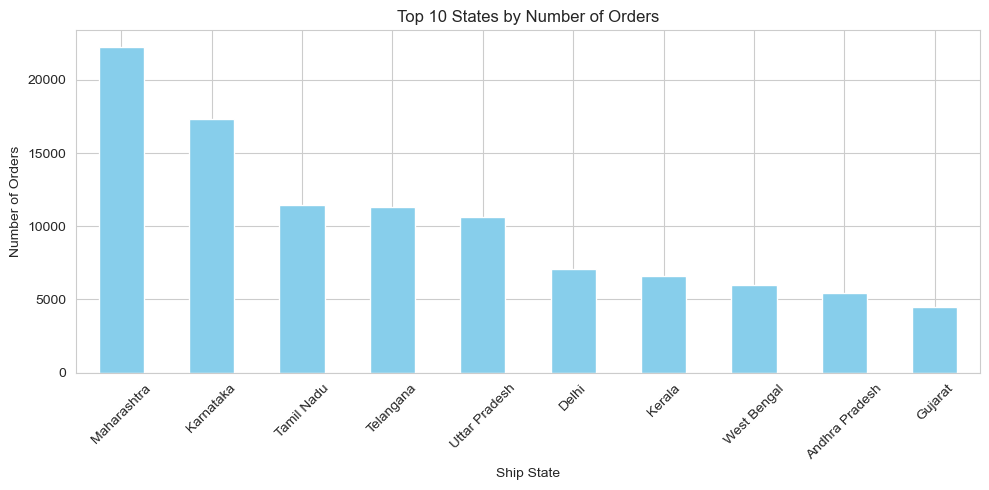

In [24]:
df['ship-state'].value_counts().head(10).plot(kind='bar',color='skyblue')
plt.title('Top 10 States by Number of Orders')
plt.xlabel('Ship State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1. Insights: 

**Maharashtra** recorded the **highest** number of orders **(over 22,000)**, followed by **Karnataka (over 17,000)**. **Tamil Nadu and Telangana** had a similar number of orders **(over 11,000 each)**. Other high performing states included Uttar Pradesh, Delhi and Kerala. **Gujarat**, despite being a major state, appeared **at the bottom of the top 10** with around **4500 orders**-comparatively lower than the top states.

**Recommendation:**

To increase orders Amazon can focus on marketing, increase seller presence in growing states.

## 2. Order Status Distribution

*Goal*: To see how many orders were shipped, cancelled, pending, etc.

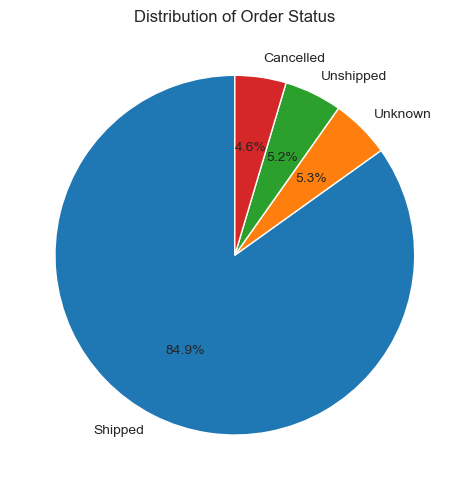

In [25]:
df['Courier Status'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90 )
plt.title('Distribution of Order Status')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### 2. Insights: 

A **majority of the orders (84.9%)** were **successfully shipped**, which is a positive sign for Amazon. The **remaining 15.1%** were either **Cancelled (4.6%)**, **Unshipped (5.2%)**, or **Unknown (5.3%)**. 

**Recommendation:**

It may be useful to check if these unfulfilled orders are coming from specific sellers-if yes, Amazon can consider reviewing or replacing those sellers.

## 3. Top Product Categories Sold

*Goal*: To find which product categories have highest number of orders.

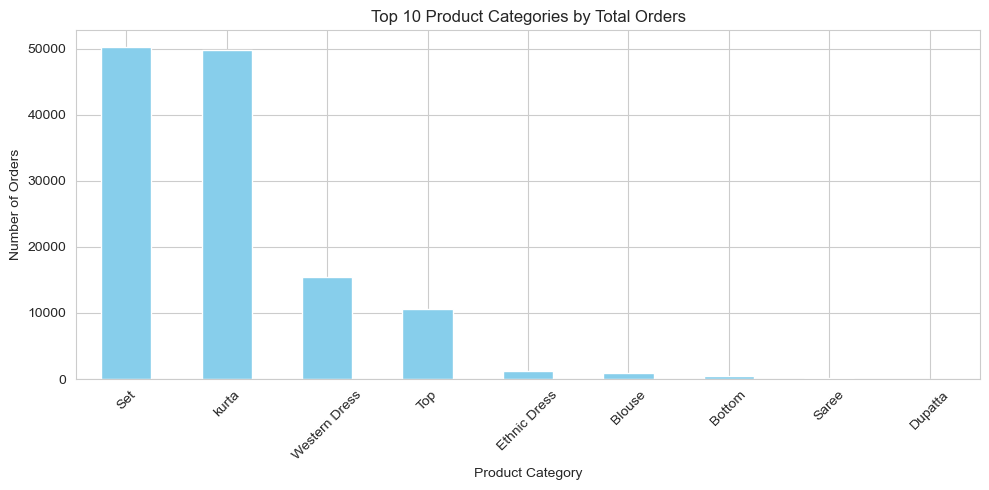

In [26]:
category_orders = df['Category'].value_counts()

category_orders.head(10).plot(kind='bar', color='skyblue')

plt.title('Top 10 Product Categories by Total Orders')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3. Insights:

Highest number of orders were made for **Set(50,000)**, followed closely by **kurta(nearly 50,000)**. The third highest product is **Western Dress** but with a significant drop to **15,000 orders only**, followed by **Top(10,000)**. In the comparatively lower orders categories were Ethnic Dress, Blouse, Bottom, Saree and Dupatta, with **Saree** and **Dupatta** orders being nearly negligible.

**Recommendation:**

Amazon could do marketing, can run discounts or special offers for categories with lower order volumes to boost customer interest and sales.

## 4. Fulfilment Type vs Total Orders

*Goal*: Understand whether orders were fulfilled by Amazon or by Seller, and how many of each?

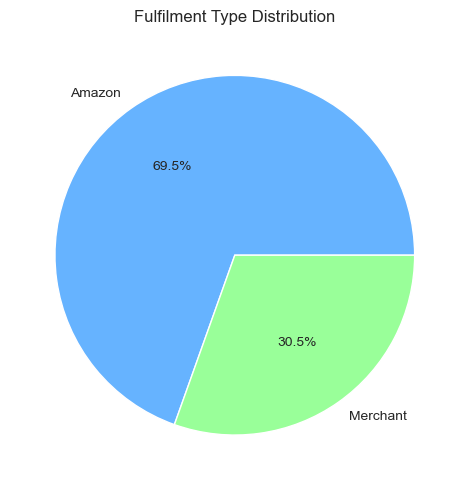

In [27]:
df['Fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Fulfilment Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### 4. Insights: 

**69.5%** of the total orders were fulfilled by **Amazon**, while the remaining **30.5%** were fulfilled by **merchants**.

**Recommendation:**  
Since a majority of orders are handled by Amazon, it indicates higher trust and reliability in Amazon’s logistics. However, merchant-fulfilled orders still form a considerable portion. Amazon can consider offering logistics support or training to high-performing merchants to improve customer satisfaction and reduce delivery-related issues.

## 5. B2B vs B2C Orders

*Goal*: Compare Business-to-Business (B2B) vs regular customer (B2C) orders. B2B orders are often larger and more valuable.

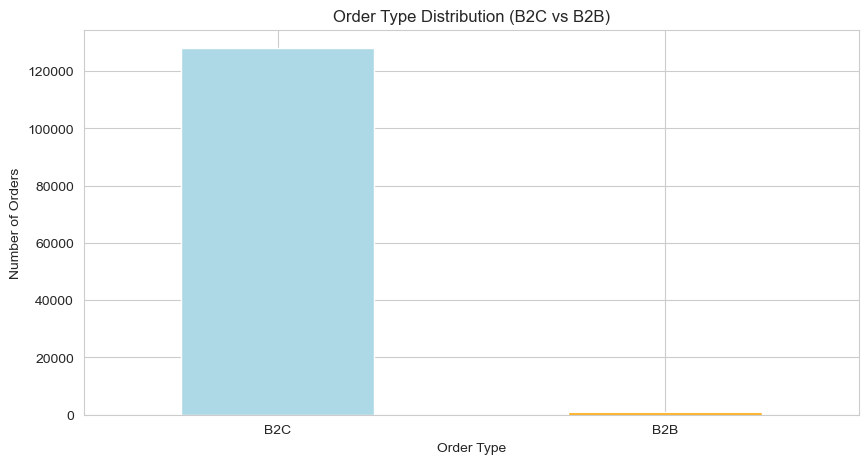

In [28]:
#Map boolean values to B2C and B2B labels
df['Order_Type'] = df['B2B'].map({False: 'B2C', True: 'B2B'})

df['Order_Type'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Order Type Distribution (B2C vs B2B)')
plt.xlabel('Order Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

#### 5. Insights:

The majority of the orders (**over 120,000**) were **B2C (Business to Consumer)**, while **B2B (Business to Business)** orders were extremely low in comparison.

**Recommendation:**  
Since most orders are from individual customers, Amazon can focus more on improving the customer shopping experience. However, the low B2B order volume also presents an opportunity — Amazon could work on onboarding more businesses and offering B2B incentives or bulk ordering options.

## 6. Top Shipping Cities

*Goal*: To find where the most orders are going?

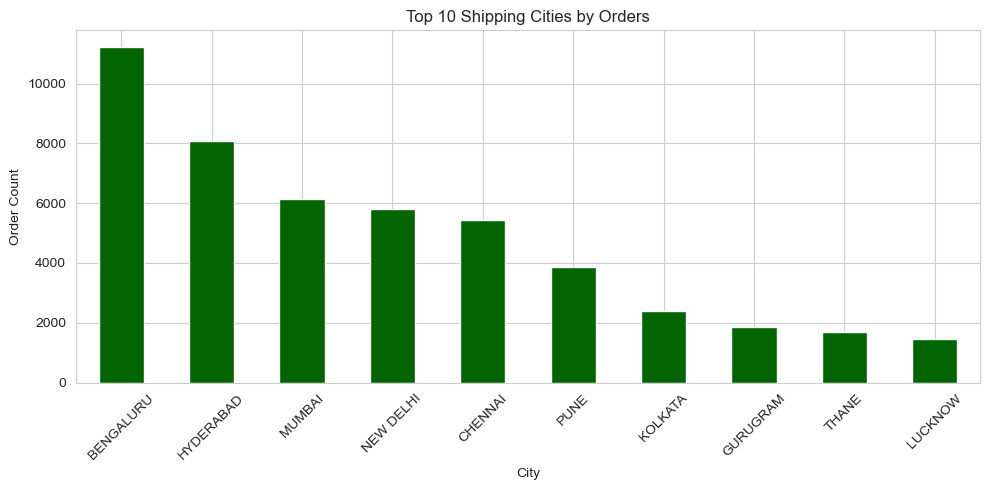

In [29]:
top_cities = df['ship-city'].value_counts().head(10)
top_cities.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Shipping Cities by Orders')
plt.xlabel('City')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 6. Insights:

**Bengaluru** recorded the **highest** number of orders **(~15,000)**, followed by **Hyderabad (~8,000)**, **Mumbai (~6,000)**, and **New Delhi (just under 6,000)**. Other key cities include Chennai, Pune, Kolkata, Gurugram, Thane, and Lucknow. This suggests that the **customer base is highly concentrated in metro cities**, with **Bengaluru leading** by a significant margin.


**Recommendations:**

Focus marketing efforts, logistics optimization, and customer engagement strategies in the top-performing cities such as Bengaluru, Hyderabad, and Mumbai to maximize returns. 

Additionally, analyze factors contributing to lower order volumes in cities like Lucknow to identify untouched market opportunities and drive regional growth.

## 7. Monthly Order Trend Analysis

*Goal:* To track and compare monthly order volumes and spot trends over time.

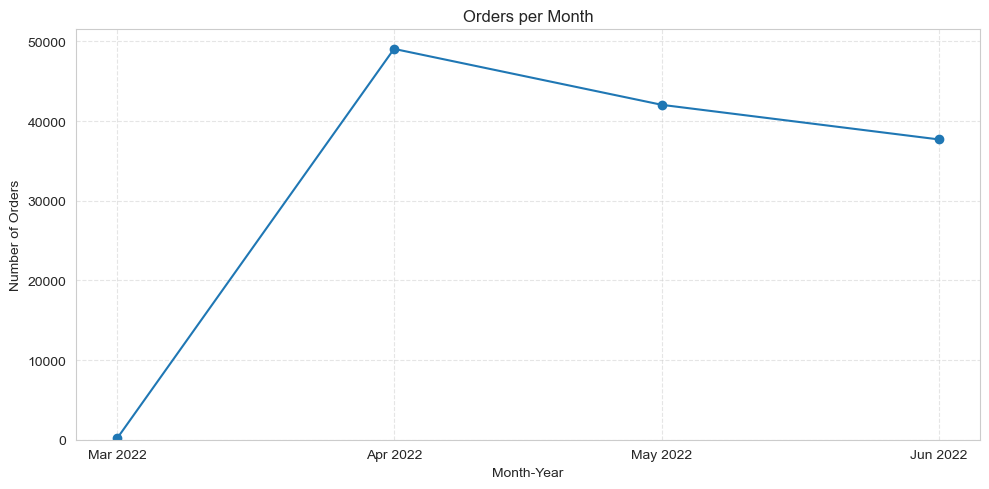

In [32]:
#Grouping by Month-Year
monthly_orders = df['Date'].dt.to_period('M').value_counts().sort_index()
monthly_orders.index = monthly_orders.index.to_timestamp()
df['Month_Year'] = df['Date'].dt.to_period('M').astype(str)


plt.figure(figsize=(10, 5))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o')
plt.title("Orders per Month")
plt.xlabel("Month-Year")
plt.ylabel("Number of Orders")
plt.ylim(bottom=0) #y-axis starts from 0
plt.xticks(monthly_orders.index, [d.strftime('%b %Y') for d in monthly_orders.index])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 7. Insights:

-March 2022 has very few orders, likely because the dataset does not have complete data for that month.

-**April 2022** recorded the **highest** number of orders, **close to 50,000**.

-In **May 2022**, orders slightly dropped but still stayed **above 40,000**.

-**June 2022** saw a further dip, with orders around **37,000–38,000**.

**Recommendations:**

~Exclude March due to incomplete data.

~Investigate the reason behind the April order peak-it might be due to consecutive festivals or the special offers during the festival sales.

~Tackle the decline in May and June with better engagement or marketing — try surprise summer sales or limited-time offers to boost orders.

In [33]:
#Export cleaned data to csv
df.to_csv("Amazon_cleaned_sales.csv",index=False)

## Summary:

This exploratory data analysis focused on understanding order trends and patterns across various dimensions of the dataset.

**Key findings include:**

-Certain states and cities consistently show higher order volumes, suggesting regional demand clusters.

-Completed orders dominate, but canceled/refunded ones also highlight areas for improvement.

-Set and Kurta are the top product categories.

-Most orders are fulfilled by Amazon's platform, and B2C orders dominate the dataset.

-The monthly trend showed a peak in April, with a gradual decline in May and June. March data was excluded due to incompleteness.

These insights can help guide marketing efforts, inventory planning, and regional targeting.